# Engineering Programming - Project: part 2
<quote> @valigatotuS </quote><br>2nd Bachelor Industrial Engineering
___

### Table of Contents
* 2.0 [Introduction](#2.0-Introduction)
* 2.1 [Visual Overview](#2.1-Visual-Overview)
* 2.2 [Normalization](#2.2-Normalization)
* 2.3 [Local Waves](#2.3-Local-Waves)

## 2 Data Analysis with Pandas

### 2.0 Introduction

_“By visualizing information, we turn it into a landscape that you can explore with your eyes. A sort of information map. And when you’re lost in information, an information map is kind of useful.” – David McCandless_

This assignement was given for gaining experience with the "Pandas" python-library and data-analysis. 

In [4]:
import pandas as pd

We will go through some steps of data-analysis and so discover the Pandas-features.

### 2.1 Visual Overview

>Plotting the total number of confirmed cases, the total number of hospitalisations, and the total number of deaths by date on one line graph.(1)

Storing the csv's into variabels as a dataframe with `pd.read_csv()`:

In [106]:
#storing data of csv in variabels into dataframes:
cases_csv = pd.read_csv('./../files/data/COVID19BE_CASES_AGESEX.csv')
hosp_csv = pd.read_csv('./../files/data/COVID19BE_HOSP.csv')
mort_csv = pd.read_csv('./../files/data/COVID19BE_MORT.csv') 

For this exercices we will need to plot the total numbers of confirmed cases, hospitalisations   and deaths by date as a line-plot.                                                                   


Procedure:
1. __Getting usefull data__: slicing usefull data out of the dataframes
    - slicing with columnnames: `a_csv[["neededcol1, neededcol2"]]`
2. __Arranging & Merging those data__: modyfying & grouping data (by date/age/...)
    - renaming df columnnames: `a_df.rename(columns = {'old_col':'new_col'})`
    - grouping df's by columnname: `a_df.groupby("a_columnname").operation()`
    - merging df's: `a_df.merge(b_df, on = "a_columnname", how = "left/right")`
3. __Plotting__ : plotting data
    - plotting df's: `a_df.plot(title = "a_title", kind = "a_kind", rot = ..., ...)`

In [104]:
# slicing needed data by their columnnames 
cases = cases_csv[["DATE", "CASES"]] 
hospi = hosp_csv[["DATE", "NEW_IN"]].rename(columns = {'NEW_IN':'HOSPITALISATIONS'}) #renaming the hospitalisations column
deaths = mort_csv[["DATE", "DEATHS"]]

In [7]:
# grouping data by "DATE"
cases = cases.groupby('DATE').sum()
hospi = hospi.groupby('DATE').sum()
deaths = deaths.groupby('DATE').sum()

In [8]:
# getting cumulative numbers
cum_cases = cases.cumsum()
cum_hospi = hospi.cumsum()
cum_deaths = deaths.cumsum()

In [9]:
# merging dataframes by date
df_COV19 = cum_cases.merge(cum_hospi, on = 'DATE', how = "left").merge(cum_deaths, on = 'DATE', how = "left")

In [111]:
df_COV19

,CASES,HOSPITALISATIONS,DEATHS
DATE,,,
2020-03-01,19,NaN,NaN
2020-03-02,38,NaN,NaN
2020-03-03,72,NaN,NaN
2020-03-04,125,NaN,NaN
2020-03-05,206,NaN,NaN
...,...,...,...
2020-11-16,544331,38853.0,14924.0
2020-11-17,548984,39225.0,15069.0
2020-11-18,552240,39581.0,15213.0


In [110]:
# filling missing values with previous one (filling the gaps)
df_COV19 = df_COV19.fillna(method = "ffill") 

In [12]:
months = ["Feb","Mar","Apr","Jun","Jul","Sep","Nov"]

[Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Nov')]

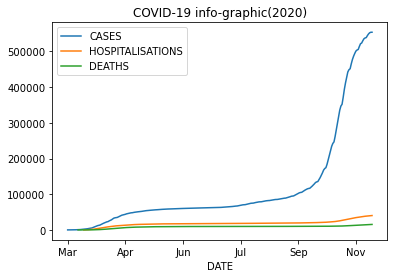

In [13]:
# plotting COV19 dataframe
df_COV19.plot(title = "COVID-19 info-graphic(2020)").set_xticklabels(months)

<font color = "gray">
We can remark peaks during April and October-November.
</font>

>Plotting these statistics by age on a histogram.(2)

In [14]:
#Slicing needed data by their columnnames 
age_cases = cases_csv[["AGEGROUP", "CASES"]] 
age_deaths = mort_csv[["AGEGROUP", "DEATHS"]]

In [15]:
#grouping data by "Age-Group"
age_cases = age_cases.groupby('AGEGROUP').sum()
age_deaths = age_deaths.groupby('AGEGROUP').sum()

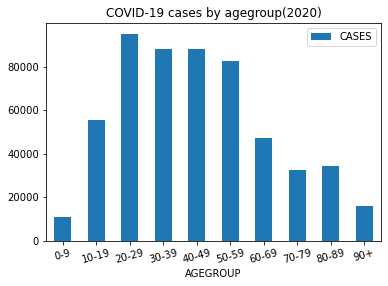

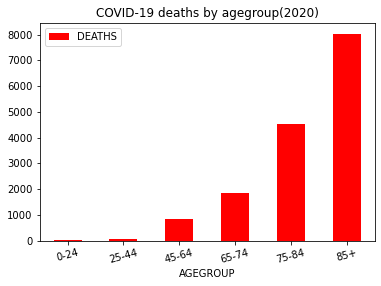

In [16]:
#plotting cases & deaths by age on a histogram
age_cases.plot(kind = "bar", rot = 15, title = "COVID-19 cases by agegroup(2020)")
age_deaths.plot(kind = "bar", rot = 15, color = "red", title = "COVID-19 deaths by agegroup(2020)")

<font color = "gray">
We can deduce that there are a lot (> 80.000) of cases amoung young-people (20-59) but not many (< 20.000) amoung youngest (0-9) and oldest (90+) people .<br>
By agegroup we can deduce that the number of deaths increase with age.
</font>

>Calculating and plotting the ratio of mortality to confirmed infections.(3)

In [17]:
#calculating mortality ratio by date
MortRatio = pd.DataFrame({"Mortality Ratio": (deaths["DEATHS"] / cases["CASES"])})

Last element is causing a giant unjustified peak so we need to remove it

Choosing how to remove last element by execution-time `%timeit`
1. `MortRatio.drop(MortRatio.tail(1).index, inplace=True)` #427 µs
2. `MortRatio[:-1]` #73 µs

=>second method is ~6x faster

In [18]:
# removing last element and filling gaps
MortRatio = MortRatio[:-1].fillna(method = "ffill") 

[Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Nov')]

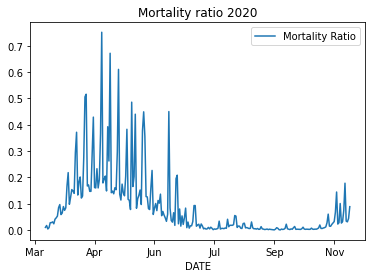

In [19]:
#plotting mortality ratio
MortRatio.plot(title = "Mortality ratio 2020").set_xticklabels(months)

<font color = "gray">
From this graph we can learn that the mortality-ratio-peaks were specially high from April to June and decreased drasically after.  
</font>

### 2.2 Normalization

>Plotting the ratio of confirmed cases to tests conducted.(1)

In [20]:
test_csv = pd.read_csv('data/COVID19BE_tests.csv')

In [21]:
test_df = test_csv[["DATE","TESTS_ALL","TESTS_ALL_POS"]].groupby("DATE").sum()

In [22]:
#calculating ratio of confirmed cases to tests conducted
test_df["RATIO_ALL2POS"] = test_df["TESTS_ALL_POS"] / test_df["TESTS_ALL"]

[Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Nov')]

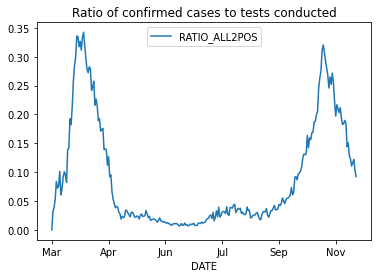

In [23]:
#plotting ratio 
pd.DataFrame(test_df["RATIO_ALL2POS"]).plot(title = "Ratio of confirmed cases to tests conducted").set_xticklabels(months) 

<font color = "gray">
We can deduce that there were a lot of positives tests during March-April and October-November.
</font>

<font color = "gray">
Comparing this graph with 2.1 we can say that both have peaks at the same months. We can observe how the quarantine / deconfinement drastically influenced those graphs.                                                                         (first quarantine  : 17/03-19/04 ; second quarantine : 02/11-...)
</font>

### 2.3 Local Waves

>Function that returns for each province the total number of infections in the 14 days leading up to a given date.(1)

In [24]:
def CasesOfPrev2Weeks_Provinces(df: pd.DataFrame, date: str) -> dict:
    """
    Returns for each province the total number of infections in the 14 days leading up to a given date.
    """
    result = {}
    provinces = pd.unique(df.PROVINCE.dropna()).tolist() # removing duplicates
    validDays = (pd.date_range(start = pd.Timestamp(date) - pd.offsets.Week(2), end = date)).astype(str) #list of days
    
    for province in provinces:
        infections = df.loc[(df.PROVINCE == province) & (df.DATE.isin(validDays))].CASES.sum() # number of infection in province during 14-day period
        result[province] = infections
    
    return result

Example:

In [25]:
# numbers of infections per province in 14-days leading up to given date 
date_x = "2020-03-15"
CasesOfPrev2Weeks_Provinces(cases_csv, date_x)

{'Antwerpen': 220,
 'Brussels': 216,
 'Liège': 197,
 'Limburg': 190,
 'OostVlaanderen': 178,
 'VlaamsBrabant': 232,
 'BrabantWallon': 55,
 'WestVlaanderen': 151,
 'Hainaut': 206,
 'Namur': 32,
 'Luxembourg': 18}

>Using this function to determine for each day which
province was having the most infections relative to their population, in the 14
days leading up to day x. Using the data in table1 to get the population.(2)

In [26]:
aDict = CasesOfPrev2Weeks_Provinces(cases_csv, date_x)

In [27]:
table1 = {"Brussels": 1_218_255,
          "Antwerpen": 1_869_730,
          "Limburg": 877_370,
          "OostVlaanderen": 1_525_255,
          "VlaamsBrabant": 1_155_843,
          "WestVlaanderen": 1_200_945,
          "BrabantWallon": 406_019,
          "Hainaut": 1_346_840,
          "Liège": 1_109_800,
          "Luxembourg": 286_752,
          "Namur": 495_832}

In [101]:
tmp_dict = {}

for key in table1.keys():
    tmp_dict[key] = aDict[key] / table1[key] # normalizing the dict with table1 by key 
    
print(f"{max(new, key = new.get)} had the most infections in the 14 days leading up to {date_x}.")

Limburg had the most infections in the 14 days leading up to 2020-03-15.


>The pie chart will show how often each province was leading the number of infections relative to their population for 14-day periods, during the whole duration of the pandemic in Belgium.

In [114]:
tmp_dict = {}
dates = pd.unique(cases_csv.DATE.dropna()).tolist() # removing duplicates
provinces = pd.unique(cases_csv.PROVINCE.dropna()).tolist() 
points = {"Brussels": 0,    # number of leading-periods (score-holder)
          "Antwerpen": 0,
          "Limburg": 0,
          "OostVlaanderen": 0,
          "VlaamsBrabant": 0,
          "WestVlaanderen": 0,
          "BrabantWallon": 0,
          "Hainaut": 0,
          "Liège": 0,
          "Luxembourg": 0,
          "Namur": 0}

for date in dates:
    stats = CasesOfPrev2Weeks_Provinces(cases_csv, date) # getting 14-day stats
    for key in table1.keys(): 
        tmp_dict[key] = stats[key] / table1[key]         # normalizing stats by population
    k = max(tmp_dict, key = tmp_dict.get) # getting leading province related to numbers of infections during 14-day period
    points[k] += 1 # updating scoreboard

Text(0, 0.5, '')

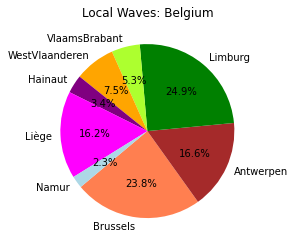

In [115]:
palette = ["coral", "brown", "green", "darkorange", "greenyellow", "orange", "cyan", "purple", "magenta", "gray", "lightblue"]
pie_df = pd.DataFrame.from_dict(points, orient = "index", columns = ["points"]) # converting the dict to a dataframe

pie_df.plot(title = "Local Waves: Belgium",
            y = "points",              # defining the axis 
            legend = False,            # hiding the legend
            colors = palette,          # defining the colors of the pie-chart
            startangle = 220,          # rotating pie-chart 220°
            kind = "pie",  
            autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '' # showing the percentages of each part (>0)
            ).yaxis.set_label_text("") # hiding y-axis

<font color = "brown">
Conclusion:<br><br>
Raw data can be hard to interpret, data visualization can in this case be very helpful for data cleaning, exploring data structure, detecting outliers and unusual groups, identifying trends and clusters, spotting local patterns and presenting results. Graphics reveal data features that statistics and models may miss: unusual distributions of data, local patterns, gaps, missing values, implicit boundaries, outliers,... 
After plotting the data we can read them more easily, data become visual and understandable.
</font>

References:
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://realpython.com/pandas-plot-python/
* https://regenerativetoday.com/a-complete-cheat-sheet-for-data-visualization-in-pandas/
* https://blog.edugrad.com/data-visualization-in-python-numpy-pandas-matplotlib-and-seaborn/
* https://hdsr.mitpress.mit.edu/pub/zok97i7p/release/2